<h1><center>ML PROJECT - MEDICAL INSURANCE COST PREDICTION </center>

### Importing the Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

### Data Collection & Analysis

In [5]:
insurance_dataset = pd.read_csv('insurance.csv')

In [6]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance_dataset.shape

(1338, 7)

In [8]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Data Preprocessing

Categorical Features:
- Sex
- Smoker
- Region

In [11]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [13]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\mrina\AppData\Local\Temp\ipykernel_10248\1211896966.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


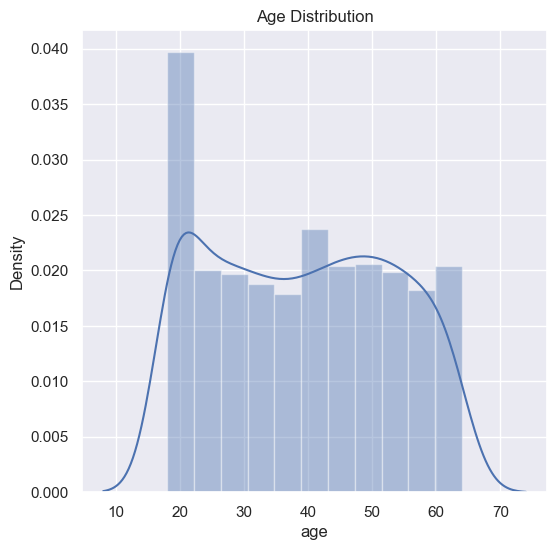

In [103]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

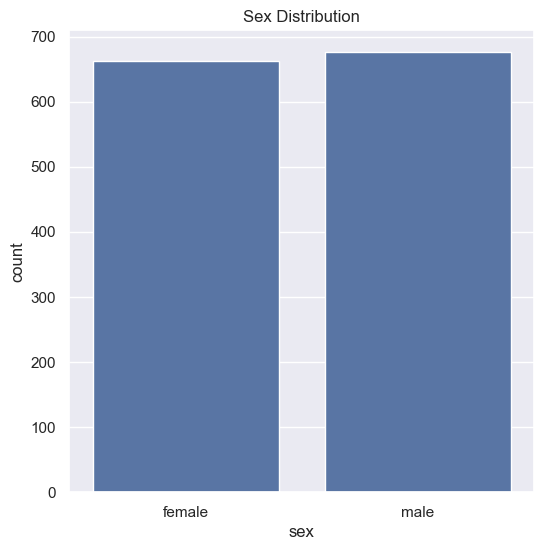

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [16]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\mrina\AppData\Local\Temp\ipykernel_10248\872932173.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


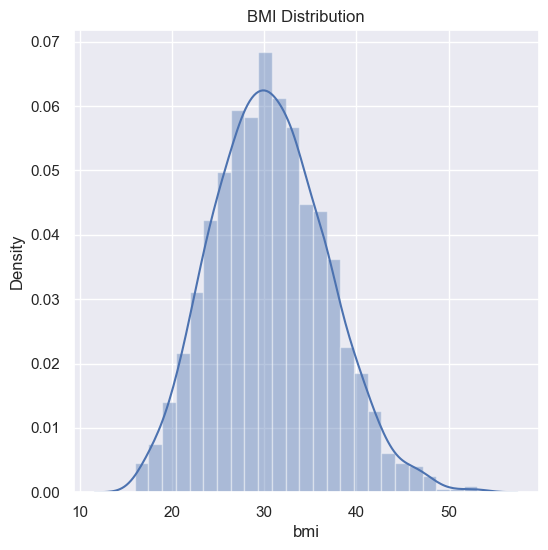

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

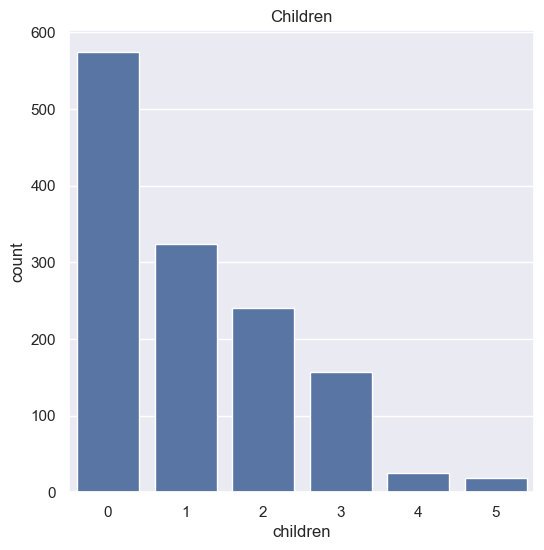

In [19]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [20]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

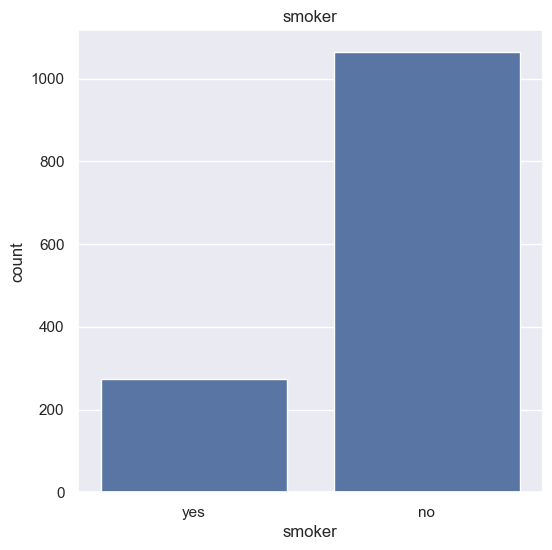

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [22]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

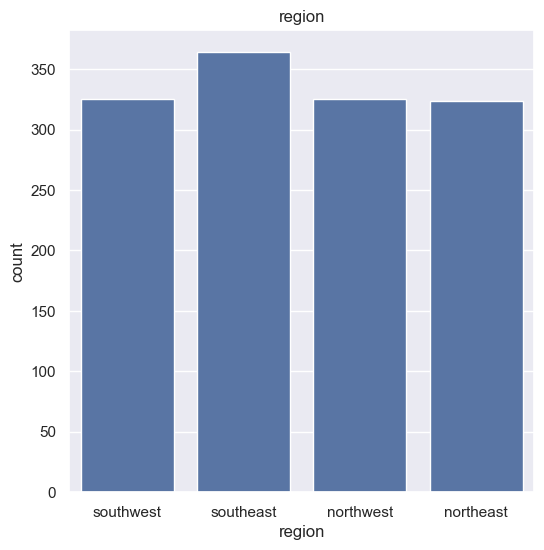

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [24]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\mrina\AppData\Local\Temp\ipykernel_10248\3649969176.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


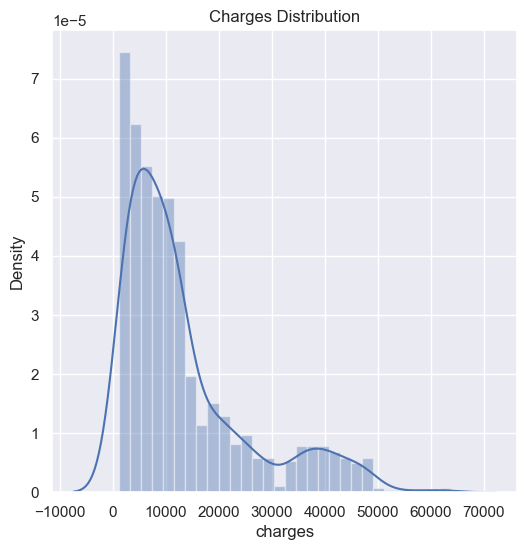

In [25]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

### Encoding the categorical features

In [27]:
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

C:\Users\mrina\AppData\Local\Temp\ipykernel_10248\3814441476.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
C:\Users\mrina\AppData\Local\Temp\ipykernel_10248\3814441476.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
C:\Users\mrina\AppData\Local\Temp\ipykernel_10248\3814441476.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version.

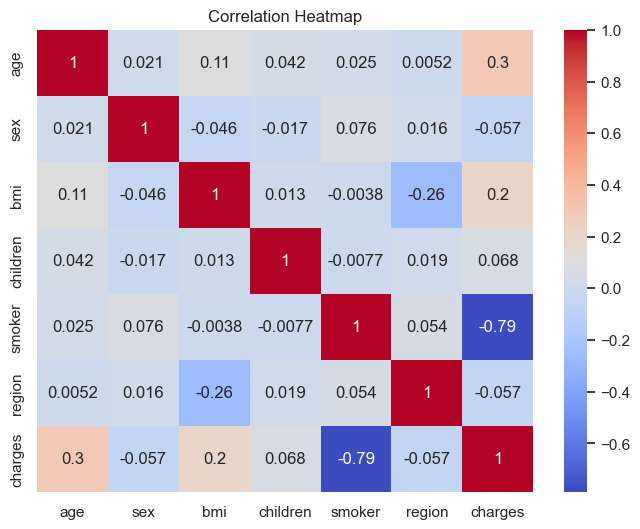

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(insurance_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Splitting the Data and Target

In [30]:
X = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

In [31]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [32]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### Splitting the data into Training data & Testing Data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Training

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [38]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = gr.predict(X_test)
df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'rf':y_pred2,'gr':y_pred3})

In [39]:
df1

,Actual,Lr,rf,gr
17,2395.17155,1520.592422,3596.213276,3997.205442
1091,11286.53870,11570.592018,11897.439663,12159.050017
273,9617.66245,10082.438499,14615.018090,11134.165033
270,1719.43630,2246.217543,2318.304058,3009.267748
874,8891.13950,7881.283620,8808.139196,10056.388319
...,...,...,...,...
232,1727.78500,-1669.890650,2033.637022,8227.747750
323,11566.30055,15722.419522,16019.132779,13566.571354
1337,29141.36030,36968.055645,28766.727747,28319.448971
1066,8978.18510,12987.364848,11570.470142,10065.341206


### Model Evaluation

In [41]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)

In [42]:
print(score1,score2,score3)

0.7447273869684077 0.8382745756026535 0.8676970413027829


In [43]:
scores=[score1,score2,score3]
model=['LR','RF','GB']
color=['m','y','g']

## Performance Visualization

Text(0.5, 1.0, 'R2 scores of regression models')

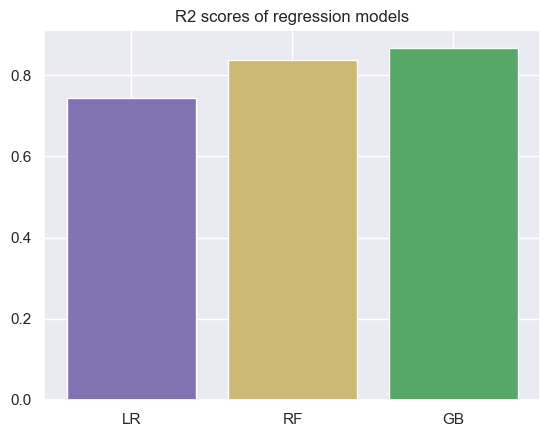

In [44]:
import matplotlib.pyplot as plt
plt.bar(model,scores,color=color)
plt.title("R2 scores of regression models")

In [45]:
mae1 = metrics.mean_absolute_error(y_test,y_pred1)
mae2 = metrics.mean_absolute_error(y_test,y_pred2)
mae3 = metrics.mean_absolute_error(y_test,y_pred3)

In [46]:
print(mae1,mae2,mae3)

4267.213826730733 2717.0182728082464 2393.6435001741525


In [47]:
mae=[mae1,mae2,mae3]
model=['LR','RF','GB']
color=['m','y','g']

Text(0.5, 1.0, 'Mean Absolute error')

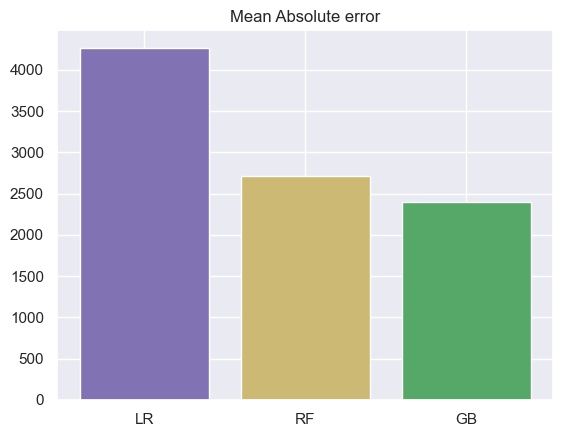

In [48]:
import matplotlib.pyplot as plt
plt.bar(model,mae,color=color)
plt.title("Mean Absolute error")

In [110]:
import numpy as np
mse1 = metrics.mean_squared_error(y_test,y_pred1)
rmse1 = np.sqrt(mse1)
mse2 = metrics.mean_squared_error(y_test,y_pred2)
rmse2 = np.sqrt(mse2)
mse3 = metrics.mean_squared_error(y_test,y_pred3)
rmse3 = np.sqrt(mse3)

In [116]:
print(mse1,mse2,mse3)
print(rmse1,rmse2,rmse3)

38337035.48643884 24288047.435049903 19869359.122783553
6191.690842285235 4928.290518531746 4457.505930762578


In [120]:
mse=[mse1,mse2,mse3]
rmse=[rmse1,rmse2,rmse3]
model=['LR','RF','GB']
color=['m','y','g']

Text(0.5, 1.0, 'Mean Square error')

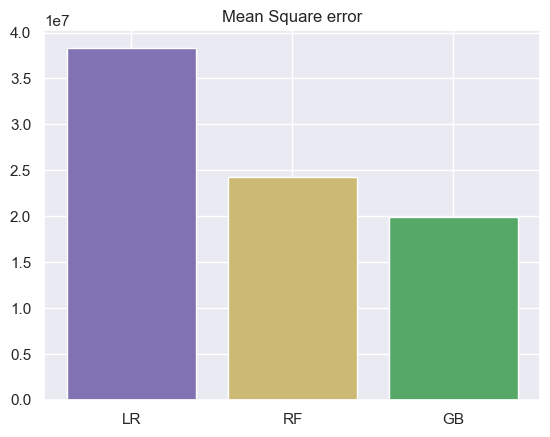

In [127]:
plt.bar(model,mse,color=color)
plt.title("Mean Square error")

Text(0.5, 1.0, 'Root Mean Square error')

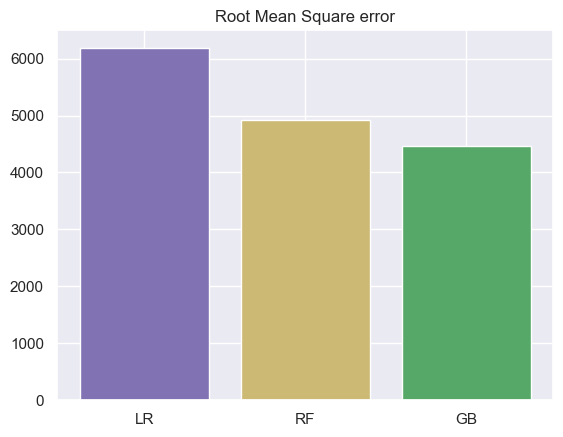

In [131]:
plt.bar(model,rmse,color=color)
plt.title("Root Mean Square error")

### Predicting Insurance cost for new person

In [50]:
# Input values: age, sex, bmi, children, smoker, region
person_info = (31, 1, 25.74, 0, 1, 0)
person_array = np.asarray(person_info)
person_array_reshaped = person_array.reshape(1, -1)
predicted_cost = gr.predict(person_array_reshaped)
print('The insurance cost is USD', predicted_cost[0])

The insurance cost is USD 4049.4229853400616


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## Saving Model using joblib

In [52]:
import joblib

In [53]:
joblib.dump(gr,'Insurance_cost_predictor')

['Insurance_cost_predictor']

In [54]:
model = joblib.load('Insurance_cost_predictor')

In [55]:
model.predict([[50,1,30.3,4,1,2]])

D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([12080.99494625])

## GUI

In [57]:
from tkinter import *

In [58]:
import joblib

In [59]:
import tkinter as tk
from tkinter import messagebox
import joblib
import numpy as np

# Function to make prediction
def predict_insurance_cost():
    try:
        age = float(age_entry.get())
        gender = float(gender_entry.get())   
        bmi = float(bmi_entry.get())
        children = float(children_entry.get())
        smoker = float(smoker_entry.get())    
        region = float(region_entry.get())  
        input_data = np.array([[age, gender, bmi, children, smoker, region]])
        model = joblib.load("Insurance_cost_predictor")
        prediction = model.predict(input_data)
        result_label.config(text=f"Predicted Insurance Cost: USD {round(prediction[0], 2)}")
    except:
        messagebox.showerror("Input Error", "Please enter valid numerical values.")

root = tk.Tk()
root.title("Insurance Cost Estimator")
root.geometry("350x350")

tk.Label(root, text="Insurance Cost Estimator", font=("Arial", 14), bg="blue", fg="white").pack(fill=tk.X, pady=10)

input_frame = tk.Frame(root)
input_frame.pack(pady=10)

tk.Label(input_frame, text="Age:").grid(row=0, column=0, sticky="e")
tk.Label(input_frame, text="Gender (1=Male, 0=Female):").grid(row=1, column=0, sticky="e")
tk.Label(input_frame, text="BMI:").grid(row=2, column=0, sticky="e")
tk.Label(input_frame, text="Children:").grid(row=3, column=0, sticky="e")
tk.Label(input_frame, text="Smoker (1=Yes, 0=No):").grid(row=4, column=0, sticky="e")
tk.Label(input_frame, text="Region (1 to 4):").grid(row=5, column=0, sticky="e")

age_entry = tk.Entry(input_frame)
gender_entry = tk.Entry(input_frame)
bmi_entry = tk.Entry(input_frame)
children_entry = tk.Entry(input_frame)
smoker_entry = tk.Entry(input_frame)
region_entry = tk.Entry(input_frame)

age_entry.grid(row=0, column=1)
gender_entry.grid(row=1, column=1)
bmi_entry.grid(row=2, column=1)
children_entry.grid(row=3, column=1)
smoker_entry.grid(row=4, column=1)
region_entry.grid(row=5, column=1)

tk.Button(root, text="Predict Cost", command=predict_insurance_cost).pack(pady=10)

result_label = tk.Label(root, text="", font=("Arial", 12), fg="green")
result_label.pack()

root.mainloop()

D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
